In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import sys

In [2]:
def read_file(filename, encode = 'UTF-8'):
    """
    Read the text file with the given filename;
    return a list of the words of text in the file; ignore punctuations.
    also returns the longest word length in the file.
    """
    punctuation_set = set(u'''_—＄％＃＆:#$&!),.:;?]}¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒
    ﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠
    々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻
    ︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    num = 0
    word_list = []
    with open(filename, "r", encoding = encode) as file:
        for line in file:
            l = line.split()
            for word in l:
                new_word = ''
                ch_list = list(word)
                for c in ch_list:
                    if c not in punctuation_set and not c == "_":
                        new_word = new_word + c
                if not len(new_word) == 0: 
                    word_list.append(word)
                    if len(word) > num:
                        num = len(word)
                    
    print("Read file successfully!")
    return word_list, num
    

In [3]:
def count_frequency(word_list):
    """
    Input: a list containing words or characters
    Return: a dictionary mapping words to frequency.
    """
    D = {}
    for new_word in word_list:
        if new_word in D:
            D[new_word] = D[new_word]+1
        else:
            D[new_word] = 1
    return D

In [4]:
def decide_seq_order(word_list):
    """
    Input: a list containing words or characters
    Return: a dictionary mapping each word to its sequential number, which is decided by the order it 
            first appears in the word_list.
            
            And a list containg non-repetitive words, each in the order it first appears in word_list.
    """
    D = {}
    another_list = []
    for word in word_list:
        if word not in another_list:
            another_list.append(word)
    for num in range(len(another_list)):
        D[another_list[num]] = num + 1
    
    return D, another_list

In [5]:
def transfrom_wordlist_into_charlist(word_list):
    """Divide each words in the word_list into characters, order reserved.
    Input: a list containing words
    Return: a list containg char, 
    """
    char_list = []
    for word in word_list:
        char_list.extend(list(word))
        
    return char_list

In [6]:
def produce_data_frame(word_list, word_freq, word_seq,varibleTitle ):
    word_list = list(set(word_list))
    data = {}
    word_seq_list = []
    word_freq_list = []
    
    for word in word_list:
        word_freq_list.append(word_freq[word])
        word_seq_list.append(word_seq[word])
    
    first = varibleTitle 
    second = varibleTitle + "SeqOrder"
    third = varibleTitle + "Freq"
    forth = varibleTitle + "Rank"
    
    data[first] = word_list
    data[second] = word_seq_list
    data[third] = word_freq_list  
    
    dataFrame = pd.DataFrame(data)
    dataFrame = dataFrame.sort_values([third, second],ascending = [False,True])
    rank = np.array(list(range(1,len(dataFrame)+1))) 
    dataFrame[forth] = rank
    column_list = [first, third, forth, second]
    dataFrame = dataFrame[column_list]
    dataFrame = dataFrame.reset_index(drop=True)
    return dataFrame
            
            

In [7]:
def produce_wordRank_charRank_frame(pd_word,pd_char,longest):
    
    D = {}
    
    char_array = pd_char["char"]
    char_rank = {}
    
    for i in range(len(pd_char)):
        char_rank[char_array[i]] = i + 1 
    
    for i in range(longest):
        D[i] = []
    
    word_array = pd_word["word"]
    
    for word in word_array:
        for i in range(len(word)):
            D[i].append(int(char_rank[word[i]]))
        
        if len(word) < longest:
            for j in range(len(word),longest):
                D[j].append(np.nan)
    
    for k in range(longest):
        feature = str(k) + "th"+"_char_rank"
        pd_word[feature] = np.array(D[k])
    
    return pd_word  

In [8]:
def draw(data_frame,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = "fake2Viet3"):
    
    feature1 = feature[0]
    feature2 = feature[1]
    
    zeroth_char_rank = data_frame[feature1]
    word_freq = data_frame[feature2]
    
    plt.figure(1)
    plt.ylabel(feature1)
    plt.xlabel(x_label)
    plt.title(title)
    plt.plot(zeroth_char_rank,'ro')
    
    plt.figure(2)
    plt.ylabel(feature2)
    plt.xlabel(x_label)
    plt.title(title + " log-log")
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(word_freq,'ro')
    
    return None
        

In [9]:
def main(file_name, encode = "UTF-8"):
    l, longest_l = read_file(file_name,encode)
    word_freq = count_frequency(l)
    print("Successfully count word freqency!")
    word_seq, word_list = decide_seq_order(l)
    c_list = transfrom_wordlist_into_charlist(l)
    char_seq, char_list = decide_seq_order(c_list)
    char_freq = count_frequency(c_list)
    print("Successfully count char freqency!")
    pd_word= produce_data_frame(word_list, word_freq, word_seq,"word")
    another_word = pd_word.copy()
    pd_char= produce_data_frame(char_list, char_freq, char_seq,"char")
    data_frame = produce_wordRank_charRank_frame(pd_word,pd_char,longest_l)
    print("Successfully build data frames!")
    return data_frame, pd_char, another_word

###  Change the code below when you want to make statistical counting of the other text file.

In [10]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
filename = "DEC21FAKE1.txt" #change filename if you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


In [11]:
print(big.to_string()) 

     word  wordFreq  wordRank  wordSeqOrder  0th_char_rank  1th_char_rank
0      看日       181         1            68             52              8
1      陳許       171         2           959            101            187
2      奴豪       168         3           469            713            714
3      研肖       165         4          2113            292            726
4      計吐       158         5           938            165            690
5      微嗅       157         6           257            114            746
6      佩演       156         7           524            620            195
7      軟河       156         8           645            734            438
8      扣長       155         9           212            443             13
9      情建       154        10            75             34            216
10     小醫       154        11            92              5            253
11     珍繁       153        12           194            220            434
12     價你       153        13         

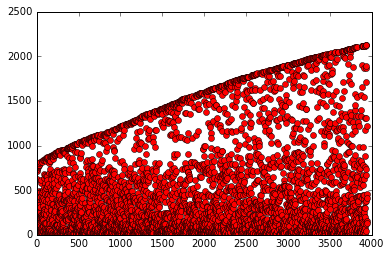

In [12]:
xx = big["0th_char_rank"]
plt.plot(xx,'ro')

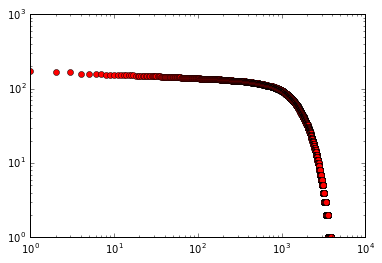

In [13]:
yy = word['wordFreq']
plt.yscale('log')
plt.xscale('log')
plt.plot(yy,'ro')

In [21]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
filename = "DEC20FAKE1_2.txt" #change filename if you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


In [10]:
#feel free to uncomment the following code if you want to save data frames to .csv files.
#char.to_csv('out1.csv', sep=',')
#word.to_csv('out2.csv', sep=',')
#big.to_csv("out3.csv",sep = ",")

In [22]:
print(big.to_string()) 

    word  wordFreq  wordRank  wordSeqOrder  0th_char_rank  1th_char_rank
0     里孫      1236         1           234             63             64
1     疑橋      1232         2            58             65             66
2     釣常      1231         3            26             67             68
3     熟演      1223         4             6             70             57
4     傷向      1220         5            52             10             29
5     人為      1220         6           207              3             69
6     隨逝      1209         7           130             71             51
7     命馬      1203         8            34             13             38
8     節錢      1197         9            25             73             74
9     燕族      1195        10           125             75             76
10    總準      1194        11            40             34             72
11    下前      1194        12           172              5             58
12    蠟語      1192        13            43         

In [17]:
print(word.to_string())

  word  wordFreq  wordRank  wordSeqOrder
0   半蓉     79834         1             1
1   以國     48634         2             2
2   美區     48351         3             3
3   惑酷     10656         4             4
4   會唐     10610         5             5
5   祕訂       945         6             7
6   是買       907         7             6
7   鬆夫        34         8             9
8   衡加        28         9             8
9   仁論         1        10            10


In [18]:
print(char.to_string())

   char  charFreq  charRank  charSeqOrder
0     半     79834         1             1
1     蓉     79834         2             2
2     以     48634         3             3
3     國     48634         4             4
4     美     48351         5             5
5     區     48351         6             6
6     惑     10656         7             7
7     酷     10656         8             8
8     會     10610         9             9
9     唐     10610        10            10
10    祕       945        11            13
11    訂       945        12            14
12    是       907        13            11
13    買       907        14            12
14    鬆        34        15            17
15    夫        34        16            18
16    衡        28        17            15
17    加        28        18            16
18    仁         1        19            19
19    論         1        20            20


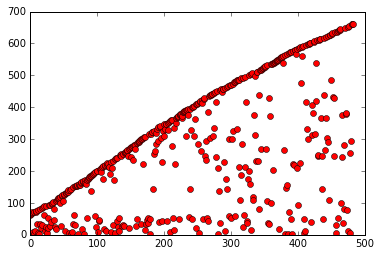

In [23]:
xx = big["0th_char_rank"]
plt.plot(xx,'ro')

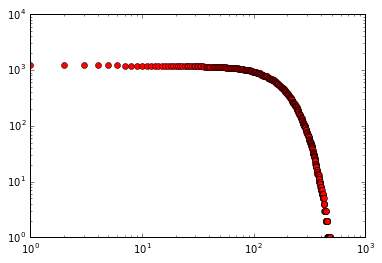

In [24]:
yy = word['wordFreq']
plt.yscale('log')
plt.xscale('log')
plt.plot(yy,'ro')